In [1]:
import cv2
import imutils
from matplotlib import pyplot as plt

In [40]:
image = cv2.imread("Samples/Test3.png")

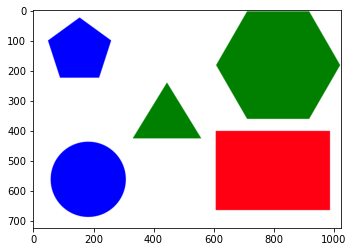

In [41]:
plt.imshow(image)
plt.show()

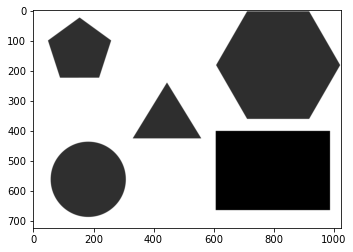

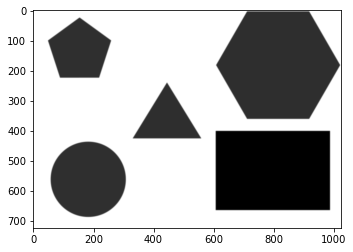

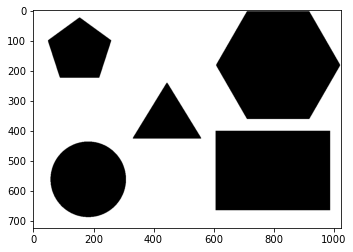

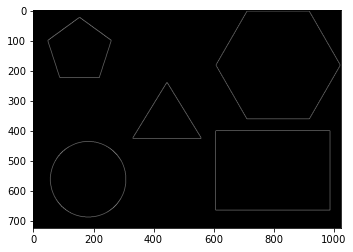

In [42]:

# and threshold it
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap= 'gray')
plt.show()
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred,cmap= 'gray')
plt.show()
thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh,cmap= 'gray')
plt.show()
edges = cv2.Canny(thresh,100,200)
plt.imshow(edges,cmap= 'gray')
plt.show()

In [43]:
cnts,_ = cv2.findContours(edges, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


In [44]:
print(len(cnts))

5


shape circle


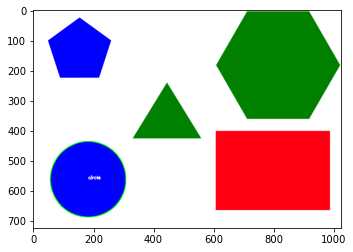

aspect ratio 1.441509433962264
shape rectangle


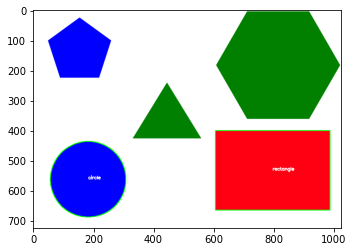

shape triangle


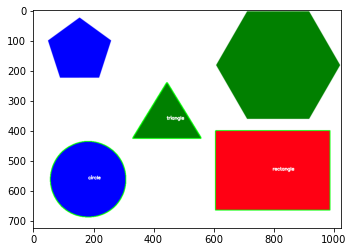

shape pentagon


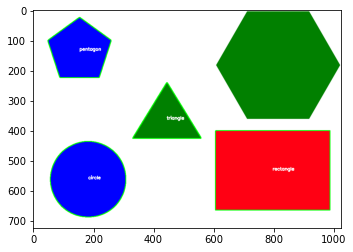

shape circle


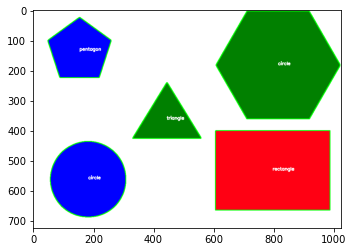

In [45]:
for c in cnts:
	# compute the center of the contour, then detect the name of the
	# shape using only the contour
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)
    if len(approx) == 3:
        shape = "triangle"
        # if the shape has 4 vertices, it is either a square or
		# a rectangle
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        print(f"aspect ratio {ar}")
			# a square will have an aspect ratio that is approximately
			# equal to one, otherwise, the shape is a rectangle
        shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
		# if the shape is a pentagon, it will have 5 vertices
    elif len(approx) == 5:
        shape = "pentagon"
		# otherwise, we assume the shape is a circle
    else:
        shape = "circle"
   
    # multiply the contour (x, y)-coordinates by the resize ratio,
    # then draw the contours and the name of the shape on the image
    print(f"shape {shape}")
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
    0.5, (255, 255, 255), 2)
	# show the output image
    plt.imshow(image)
    plt.show()